In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt
from datetime import timedelta
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [ ]:
# Step 1 - Climate Analysis and Exploration
### Precipitation Analysis

# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [19]:
# CALCULATING QUERY DATE 
# .first()function will result in a tuple
last_dt2 = session.query(func.max(Measurement.date)).first()
last_dt2

('2017-08-23')

In [20]:
# The result of the query will be a list of tuples. Parsing out the first element out of the first tuple will 
#give the date in a string

last_dt = session.query(func.max(Measurement.date)).all()[0][0]
last_dt

'2017-08-23'

In [21]:
# using the above string and parsing it : year, month, day and then converting each into interger 
year = int(last_dt[0:4])
month = int(last_dt[5:7])
day = int(last_dt[8:])


In [22]:
# passing year,month,day( using code) into date()funtion to convert it to datetime data type
date( int(last_dt[0:4]), int(last_dt[5:7]),int(last_dt[8:]))

datetime.date(2017, 8, 23)

In [23]:
# passing year,month,day( using variables) into date()funtion to convert it to datetime data type
last_date = date(year , month, day)
last_date

datetime.date(2017, 8, 23)

In [104]:
# quering date and precipitation between 2017-08-23 and 2016-08-23 . Limiting to 10 records to show result.
query_date = last_date - timedelta(days=365)
sel=[Measurement.date, Measurement.prcp]
data1 = session.query(*sel).filter(Measurement.date >= query_date, Measurement.date <= last_date).limit(10).all()
data1

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [101]:
# quering date and precipitation between 2017-08-23 and 2016-08-23 . 
query_date = last_date - timedelta(days=365)
sel=[Measurement.date, Measurement.prcp]
data = session.query(*sel).filter(Measurement.date >= query_date, Measurement.date <= last_date).all()


In [25]:
# saving date and precipitation results in a Pandas Data Frame,  set date as index . # Sort the dataframe by date

df = pd.DataFrame(data, columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
increasing_dt = df.sort_values(["date"] ,ascending = True)

valuesdf =increasing_dt.dropna(how ='any')
valuesdf.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


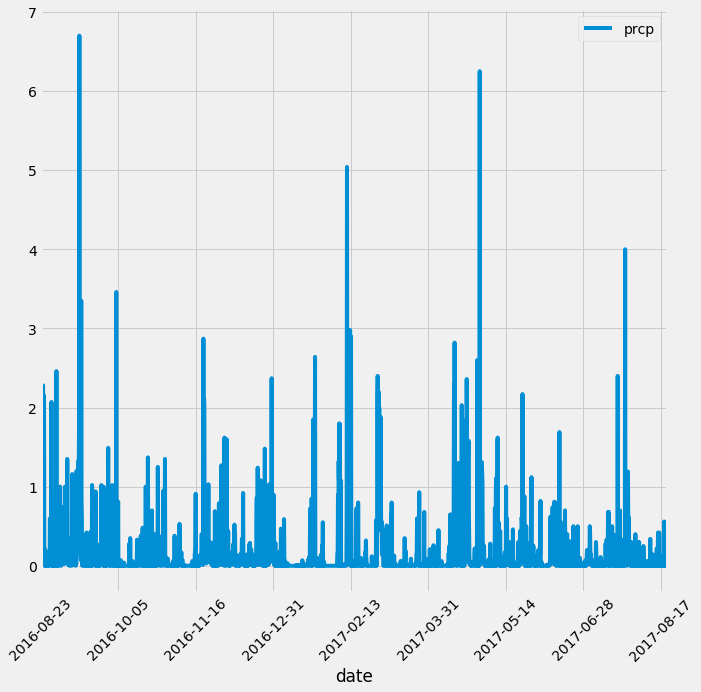

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data
data_plot= valuesdf.plot(rot=45, figsize=(10,10))                                  
data_plot
plt.show()

In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation date
valuesdf.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
### Station Analysis

In [37]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [38]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count (Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel=[func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)]
session.query(*sel).group_by(Measurement.station). filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [42]:
# Choose the station with the highest number of temperature observations.

session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station)\
.order_by(func.count (Measurement.tobs).desc()).first()

('USC00519281', 2772)

In [43]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp= session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
.filter(Measurement.date >= query_date, Measurement.date <= last_date).all()
temp_list = list(np.ravel(temp))

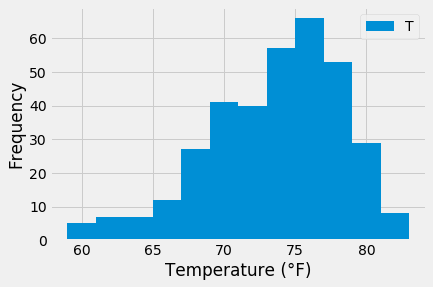

In [68]:
plt.hist(temp_list, bins=12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.legend("T")
plt.show()

In [ ]:
### Optional: Other Recommended Analyses

In [69]:
### Temperature Analysis I

In [70]:
#Identify the average temperature in June at all stations across all available years in the dataset. 
june_temp = session.query(func.avg(Measurement.tobs)).\
filter(func.strftime("%m", Measurement.date) == "06").group_by(Measurement.station).all()

june_temp_list = list(np.ravel(june_temp))
june_temp_list

[74.13939393939394,
 74.05084745762711,
 76.00537634408602,
 71.9372197309417,
 76.6554054054054,
 73.39473684210526,
 73.27118644067797,
 77.55932203389831,
 76.66810344827586]

In [72]:
# Do the same for December temperature.

dec_temp = session.query(func.avg(Measurement.tobs)).\
filter(func.strftime("%m", Measurement.date) == "12").group_by(Measurement.station).all()
dec_temp_list = list(np.ravel(dec_temp))
dec_temp_list

[69.6842105263158,
 71.06944444444444,
 73.2247191011236,
 69.29126213592232,
 71.8348623853211,
 72.42105263157895,
 69.90322580645162,
 71.10952380952381,
 72.43333333333334]

In [73]:
# perfoming a paired-t test because the  test group is the same . We are collecting June and Dec temparatures 
#of the same group of stations. The pvalue is less than 0.05 in
from scipy import stats
stats.ttest_rel(june_temp_list, dec_temp_list)

Ttest_relResult(statistic=6.95696617044294, pvalue=0.00011759380231523222)

In [ ]:
### Temperature Analysis II

In [67]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [74]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# my vacation dates were 2018-01-05 to 2018-02-05 , hence an year earlier would be 2017-01-05 to 2017-02-05
#print(calc_temps( '2017-01-05','2017-02-05'))
temp_stats = calc_temps( '2017-01-05','2017-02-05')
temp_stats

[(59.0, 69.64321608040201, 81.0)]

In [75]:
temp_stats_list = list (np.ravel(temp_stats))
temp_stats_list


[59.0, 69.64321608040201, 81.0]

<IPython.core.display.Javascript object>


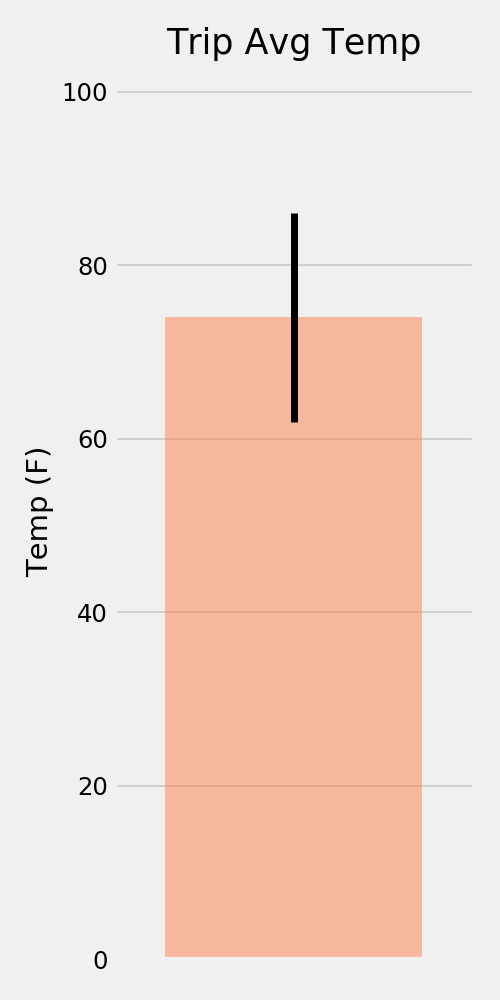

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [76]:
start_date = '2017-01-05'
end_date = '2017-02-05'
sel=[Measurement.station, Station.name, Station.latitude, Station.longitude,\
 Station.elevation, func.sum(Measurement.prcp)]

station_stats = session.query(*sel).filter(Measurement.station == Station.station).\
group_by(Measurement.station).order_by(func.sum(Measurement.station).desc()).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

station_stats

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.65),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  7.5),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.05),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.53),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.41000000000000003),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.66)]

## Optional Challenge Assignment

In [78]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [90]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
#____________________________________________________________________________________________________________

# My vacation dates are 2017-01-05 to 2017-02-05

start_date = '2017-01-05'
end_date = '2017-02-05'
daterange = session.query(Measurement.date).\
filter(Measurement.date >= start_date, Measurement.date <= end_date ).limit(35).all()
daterange
new_list = []
for item in daterange:
    mth_day = item[0][5:]
    result = (daily_normals(mth_day))
    result_list = list(np.ravel(result))
    new_list.append(result_list)
    
new_list

[[56.0, 67.96428571428571, 76.0],
 [61.0, 68.96491228070175, 76.0],
 [57.0, 68.54385964912281, 76.0],
 [57.0, 67.16071428571429, 75.0],
 [58.0, 67.9298245614035, 78.0],
 [62.0, 69.74137931034483, 77.0],
 [57.0, 67.3103448275862, 78.0],
 [57.0, 67.4074074074074, 81.0],
 [57.0, 67.25454545454545, 77.0],
 [58.0, 69.52631578947368, 77.0],
 [56.0, 69.31372549019608, 78.0],
 [54.0, 68.62962962962963, 80.0],
 [61.0, 69.07407407407408, 76.0],
 [57.0, 68.63157894736842, 77.0],
 [60.0, 68.26315789473684, 78.0],
 [61.0, 68.86666666666666, 78.0],
 [61.0, 70.14545454545454, 76.0],
 [60.0, 69.26415094339623, 76.0],
 [57.0, 69.50909090909092, 79.0],
 [58.0, 68.76271186440678, 78.0],
 [61.0, 67.94915254237289, 75.0],
 [61.0, 70.58620689655173, 77.0],
 [59.0, 68.56896551724138, 75.0],
 [62.0, 69.03703703703704, 77.0],
 [64.0, 69.14, 76.0],
 [60.0, 67.12962962962963, 77.0],
 [60.0, 68.47368421052632, 74.0],
 [56.0, 68.14035087719299, 78.0],
 [59.0, 68.85964912280701, 77.0],
 [58.0, 67.79661016949153, 77

In [93]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(new_list, columns = ["tmin","tavg","tmax"])
df.head()


,tmin,tavg,tmax
0,56.0,67.964286,76.0
1,61.0,68.964912,76.0
2,57.0,68.543860,76.0
3,57.0,67.160714,75.0
4,58.0,67.929825,78.0


In [96]:
# coverting daterange which is a list of tuples into a list 
d_list = list(np.ravel(daterange))
# adding a new date column to dataframe 
df["date"] = d_list
#setting date cloumn as index
df.set_index('date', inplace=True)
df.head()
            

,tmin,tavg,tmax
date,,,
2017-01-05,56.0,67.964286,76.0
2017-01-06,61.0,68.964912,76.0
2017-01-07,57.0,68.543860,76.0
2017-01-08,57.0,67.160714,75.0
2017-01-09,58.0,67.929825,78.0


<IPython.core.display.Javascript object>


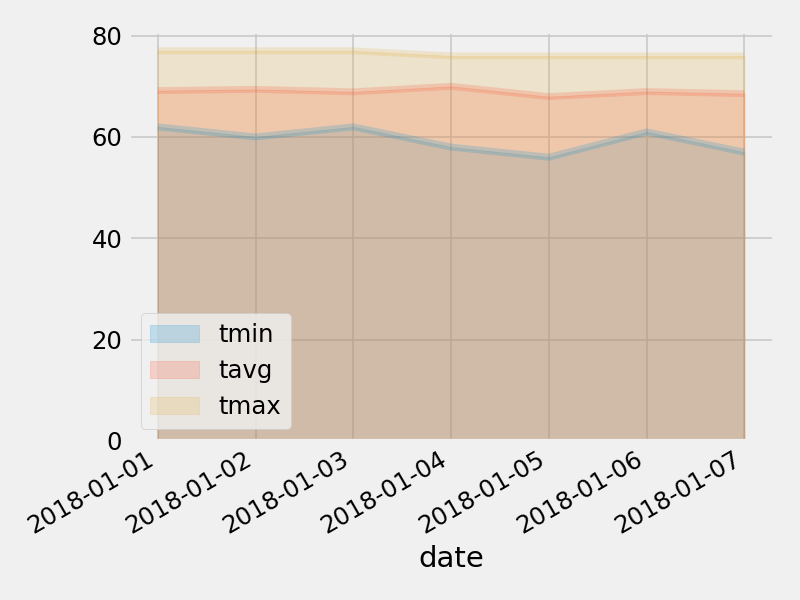

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
